In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("fact_harga.csv")

In [5]:
# melihat dimensi dataset
df.shape

(33339, 5)

In [6]:
# melihat dataset
df.head()

,id,SK_DATE,SK_RICE_TYPE,SK_MARKET,PRICE
0,1,20170101,1,0,13500
1,2,20170101,2,0,12350
2,3,20170101,3,0,12100
3,4,20170101,4,0,11500
4,5,20170101,5,0,10400


In [7]:
# melihat nama kolom pada dataframe
col_names = df.columns
col_names

Index(['id', 'SK_DATE', 'SK_RICE_TYPE', 'SK_MARKET', 'PRICE'], dtype='object')

In [8]:
# melihat summary dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33339 entries, 0 to 33338
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            33339 non-null  int64
 1   SK_DATE       33339 non-null  int64
 2   SK_RICE_TYPE  33339 non-null  int64
 3   SK_MARKET     33339 non-null  int64
 4   PRICE         33339 non-null  int64
dtypes: int64(5)
memory usage: 1.3 MB


In [9]:
# cek adanya missing value
df.isnull().sum()

id              0
SK_DATE         0
SK_RICE_TYPE    0
SK_MARKET       0
PRICE           0
dtype: int64

In [10]:
# melihat statistik summary pada variabel numerik
round(df.describe(),2)

,id,SK_DATE,SK_RICE_TYPE,SK_MARKET,PRICE
count,33339.00,33339.00,33339.00,33339.00,33339.00
mean,16670.00,20178739.06,7.66,11.38,11628.06
std,9624.28,9309.65,3.34,12.39,2810.76
min,1.00,20160101.00,1.00,0.00,0.00
25%,8335.50,20170919.00,5.00,0.00,10000.00
50%,16670.00,20181121.00,8.00,7.00,11500.00
75%,25004.50,20181227.00,10.00,22.00,12725.00
max,33339.00,20190131.00,14.00,38.00,28000.00


Text(0, 0.5, 'PRICE')

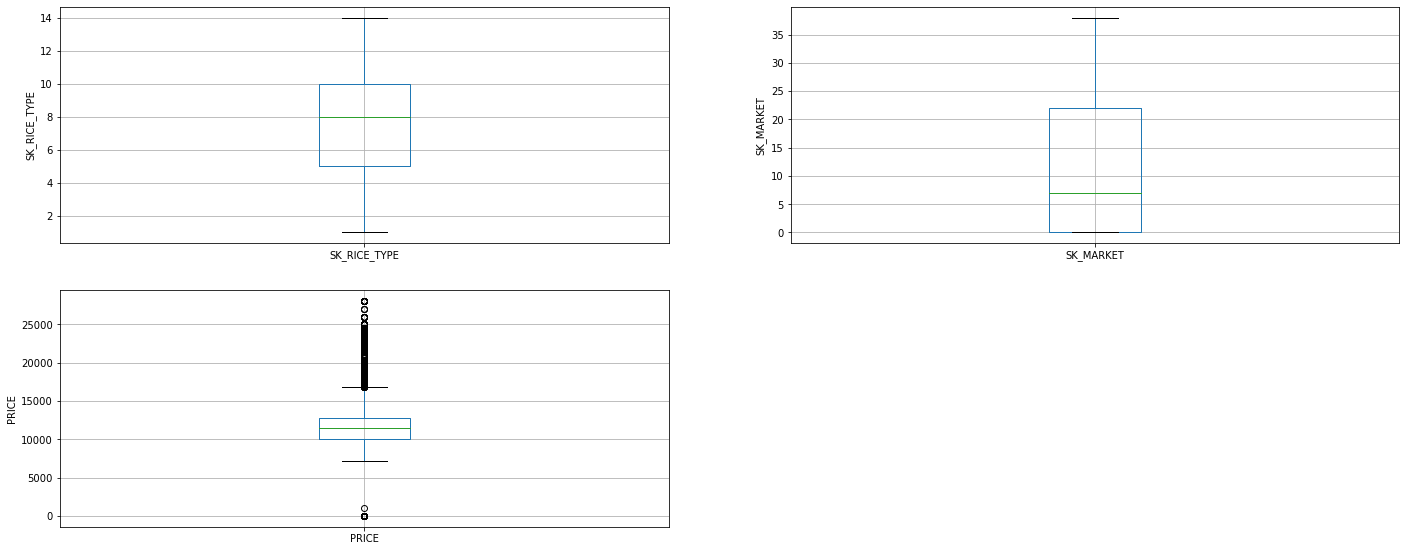

In [11]:
# menggambarkan boxplots untuk visualisasi outlier
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 3)
fig = df.boxplot(column='SK_RICE_TYPE')
fig.set_title('')
fig.set_ylabel('SK_RICE_TYPE')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='SK_MARKET')
fig.set_title('')
fig.set_ylabel('SK_MARKET')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='PRICE')
fig.set_title('')
fig.set_ylabel('PRICE')

Text(0, 0.5, 'Number of ...')

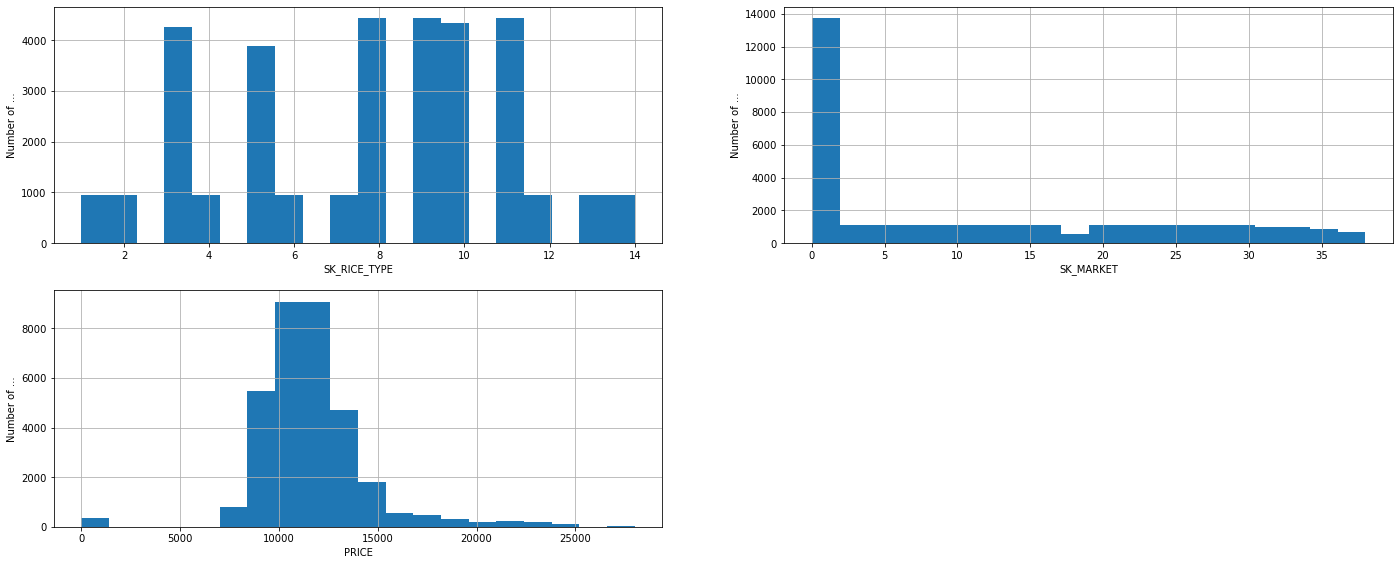

In [12]:
# plot histogram untuk mengecek distribusi
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 3)
fig = df['SK_RICE_TYPE'].hist(bins=20)
fig.set_xlabel('SK_RICE_TYPE')
fig.set_ylabel('Number of ...')

plt.subplot(4, 2, 4)
fig = df['SK_MARKET'].hist(bins=20)
fig.set_xlabel('SK_MARKET')
fig.set_ylabel('Number of ...')

plt.subplot(4, 2, 5)
fig = df['PRICE'].hist(bins=20)
fig.set_xlabel('PRICE')
fig.set_ylabel('Number of ...')

In [13]:
X = df.drop(['PRICE'], axis=1)
y = df['PRICE']

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape


((26671, 4), (6668, 4))

In [14]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,id,SK_DATE,SK_RICE_TYPE,SK_MARKET
count,2.667100e+04,2.667100e+04,2.667100e+04,2.667100e+04
mean,-1.031257e-16,1.310739e-13,-3.355354e-16,3.666637e-16
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.730502e+00,-2.002152e+00,-1.999671e+00,-9.204392e-01
25%,-8.627302e-01,-8.402062e-01,-8.003697e-01,-9.204392e-01
50%,4.716332e-04,2.557851e-01,9.910614e-02,-3.559564e-01
75%,8.649199e-01,2.671714e-01,6.987567e-01,8.536496e-01
max,1.732069e+00,1.223626e+00,1.898058e+00,2.143896e+00


In [15]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.2469


In [16]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.4676
